In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
config = {
    "base_dir":        "/eos/home-b/bpinolin/ML_output/",
    "plot_config":     "VBSOS",
    "cut":             "sr",
    "samples_version": "highZ_test",
    "cols": [
             'detajj',
             'ptll',
             'detall',        
             'jetpt1', 
             'jetpt2', 
             'met',
             'dphill',
             'dphijj',
             'Mll',
             'btag_central',
             'btag_forward',
             'dR_jl1',
             'dR_jl2',
             'Zeppll',
             'mjj',
             'Zepp1',
             'Zepp2',
             'eta1',
             'eta2',
             'qgl_forward',
             'qgl_central',
            ],
}

In [3]:
import os

config_base_dir = os.path.join(config["base_dir"], config["plot_config"])
# load numpy
samples_dir = os.path.join(config_base_dir, config["cut"] , "samples", config["samples_version"])
file_sig_bal = os.path.join(samples_dir, "for_training/signal_balanced.pkl")
file_bkg_bal = os.path.join(samples_dir, "for_training/background_balanced.pkl")

In [4]:
import pickle
signal = pickle.load(open(file_sig_bal, "rb"))
bkg = pickle.load(open(file_bkg_bal, "rb"))

In [5]:
bkg = bkg.dropna()
signal = signal.dropna()

In [6]:
signal["log(mjj)"] = np.log(signal['mjj'])
bkg["log(mjj)"] = np.log(bkg['mjj'])

signal["log(jetpt1)"] = np.log(signal['jetpt1'])
bkg["log(jetpt1)"] = np.log(bkg['jetpt1'])

signal["log(jetpt2)"] = np.log(signal['jetpt2'])
bkg["log(jetpt2)"] = np.log(bkg['jetpt2'])

## Comparing train and test

## Plotting weights

fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(bkg["puWeight"], bins=100, histtype="step", density=True, label="top", color='blue')
plt.title("puWeight Background with 0-weight events")
plt.show()

## Check weights Wnn

## Plotting all variables

## Extracting mjj for ROC

In [7]:
signal = signal[(signal['mjj'] >= 500) & (signal["detajj"] >= 3.5)]
bkg = bkg[(bkg['mjj'] >= 500) & (bkg["detajj"] >= 3.5)]

In [19]:
sig_tot = 67086
bkg_tot = 6120625

In [8]:
bins = 26

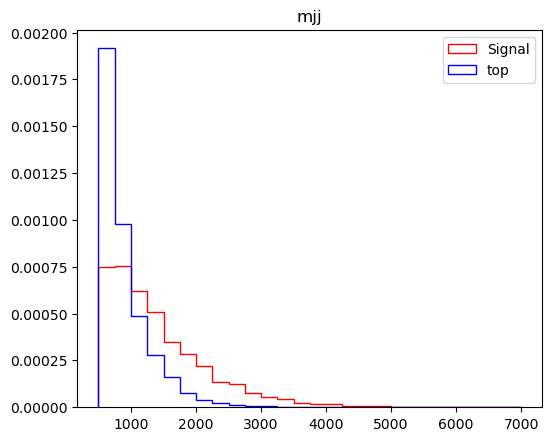

In [9]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=bins, histtype="step", weights=signal["weight_"], label="Signal", color='red', density = True, range=(500,7000))
_ = plt.hist(bkg["mjj"], bins=bins, histtype="step", weights=bkg["weight_"], label="top", color='blue', density = True, range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

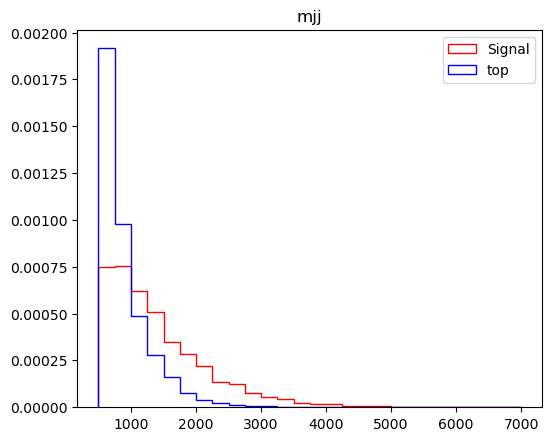

In [10]:
fig = plt.figure(figsize=(6,5), dpi=100)
_ = plt.hist(signal["mjj"], bins=bins, histtype="step", weights=signal["weight_"], label="Signal", color='red', density = True, range=(500,7000))
_ = plt.hist(bkg["mjj"], bins=bins, histtype="step", weights=bkg["weight_"], label="top", color='blue', density = True, range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

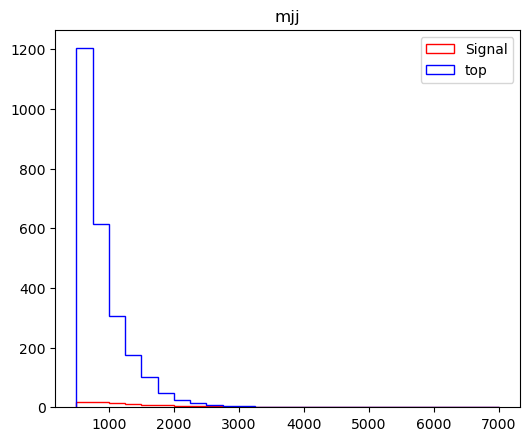

In [11]:
fig = plt.figure(figsize=(6,5), dpi=100)
n_sig, b, _ = plt.hist(signal["mjj"], bins=bins, histtype="step", weights=signal["weight_"], label="Signal", color='red', range=(500,7000))
n_bkg, b, _ = plt.hist(bkg["mjj"], bins=bins, histtype="step", weights=bkg["weight_"], label="top", color='blue', range=(500,7000))
plt.legend()
plt.title("mjj")
plt.show()

In [12]:
s_n = 0 
for i in range (10,26):
    s_n = n_sig[i]+s_n
n_sig[9] = n_sig[9]+s_n
n_sig = n_sig[0:10]

In [13]:
b_n = 0 
for i in range (10,26):
    b_n = n_bkg[i]+b_n
n_bkg[9] = n_bkg[9]+b_n
n_bkg = n_bkg[0:10]

In [14]:
effS = np.array([])
effB = np.array([])

for i in range(len(n_sig)):
    i = i+1
    S = sum(n_sig[-i:len(n_sig)])
    effS = np.append(effS, S/sum(n_sig))
    
for j in range(len(n_bkg)):
    j = j+1
    B = sum(n_bkg[-j:len(n_bkg)])
    effB = np.append(effB, B/sum(n_bkg))

In [15]:
# highZ 
# sig 0.09
# bkg 0.0036

# lowZ
# sig 0.22
# bkg 0.0032

In [16]:
# Considero efficienza di segnale e fondo delle selezioni
import numpy as np

new_effS = np.array([])
new_effB = np.array([])

for i in range (len(effS)):
    add = effS[i]*0.09
    new_effS = np.append(new_effS, add)

for i in range (len(effB)):
    add = effB[i]*0.0036
    new_effB = np.append(new_effB, add)

In [17]:
print(new_effS.tolist())
print(new_effB.tolist())

[0.0059217930384358915, 0.008687832673289658, 0.011690894725043184, 0.016631684121267525, 0.02299018197604337, 0.030797476223557725, 0.04224258975966032, 0.0561618908877327, 0.07318475167582611, 0.09]
[1.714045964149233e-05, 2.9957356857868052e-05, 5.176782629690155e-05, 8.89252923768541e-05, 0.00015656201637810317, 0.0003034180530612434, 0.0005540902326016605, 0.0009918252794594163, 0.0018728788465446073, 0.0036]
